# Python for finance and algorithmic trading (2nd edition)

# Chapter 16: Real life full project

### 16.1. Preparation of the data
> ###### 16.1.1. Importation of the data
> ###### 16.1.2. Features engineering
> ###### 16.1.3. Tain, test and validation sets	

### 16.2. Modelling the strategy
> ###### 16.2.1. Find the best assets
> ###### 16.2.2. Combine the algorithms	
> ###### 16.2.3. Apply portfolio management technics

### 16.3. Find optimal take profit, stop loss and leverage
> ###### 16.3.1. Optimal take profit	
> ###### 16.3.2. Optimal stop loss
> ###### 16.3.3. Optimal leverage


https://github.com/Quantreo/2nd-edition-BOOK-AMAZON-Python-for-Finance-and-Algorithmic-Trading/


In [6]:
# !pip install  --user ta yfinance

In [7]:
import time
import ta
import numpy as np
import pandas as pd
# import MetaTrader5 as mt5
from packages.mt5any import MetaTrader5


from datetime import datetime, timedelta
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [8]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [9]:
plt.style.use('seaborn-v0_8-whitegrid')
mt5 = MetaTrader5()
mt5.initialize()

True

### 16.1.1. Importation of the data

In [10]:
# INITIALIZE THE DEVICE
mt5.initialize()

# Create empty lists
symbols = []
sectors = []
descriptions = []

# Get the information for all symbol
symbols_information = mt5.symbols_get()

symbols_information

(SymbolInfo(custom=False, chart_mode=0, select=False, visible=False, session_deals=0, session_buy_orders=0, session_sell_orders=0, volume=0, volumehigh=0, volumelow=0, time=0, digits=5, spread=0, spread_float=True, ticks_bookdepth=0, trade_calc_mode=0, trade_mode=4, start_time=0, expiration_time=0, trade_stops_level=20, trade_freeze_level=3, trade_exemode=2, swap_mode=1, swap_rollover3days=3, margin_hedged_use_leg=True, expiration_mode=15, filling_mode=1, order_mode=63, order_gtc_mode=0, option_mode=0, option_right=0, bid=0.0, bidhigh=0.0, bidlow=0.0, ask=0.0, askhigh=0.0, asklow=0.0, last=0.0, lasthigh=0.0, lastlow=0.0, volume_real=0.0, volumehigh_real=0.0, volumelow_real=0.0, option_strike=0.0, point=1e-05, trade_tick_value=0.7247847389325371, trade_tick_value_profit=0.7247847389325371, trade_tick_value_loss=0.7249003262051468, trade_tick_size=1e-05, trade_contract_size=100000.0, trade_accrued_interest=0.0, trade_face_value=0.0, trade_liquidity_rate=0.0, volume_min=0.01, volume_max=1

In [11]:
# Tuple to list
symbols_information_list = list(symbols_information)

# Extract the name of the symbol
for element in symbols_information_list:
    symbols.append(list(element)[-3])
    sectors.append(list(element)[-1].split("\\")[0])
    descriptions.append(list(element)[-7])
    
# Create a dataframe
informations = pd.DataFrame([symbols, sectors, descriptions], index=["Symbol", "Sector", "Description"]).transpose()

informations

,Symbol,Sector,Description
0,AUDCAD,Forex Minor,Australian Dollar vs Canadian Dollar
1,AUDCHF,Forex Minor,Australian Dollar vs Swiss Franc
2,AUDNZD,Forex Minor,Australian Dollar vs New Zealand Dollar
3,AUDJPY,Forex Major,Australian Dollar vs Japanese Yen
4,AUDUSD,Forex Major,Australian Dollar vs US Dollar
...,...,...,...
292,Vol over Crash 550,Hybrid Indices,Volatility of 20% with on average 1 drop every...
293,Silver RSI Rebound Index,Tactical Indices,Index trading silver via RSI signals to profit...
294,Silver RSI Pullback Index,Tactical Indices,Index trading silver via RSI signals to profit...
295,Silver RSI Trend Up Index,Tactical Indices,Index trading silver via RSI signals to captur...


**Filter out rows where 'Sector' contains 'Forex'**

In [12]:
# Filter out rows where 'Sector' contains 'Forex'
filtered_Informations = informations[~informations['Sector'].str.contains("Forex")]

filtered_Informations

,Symbol,Sector,Description
32,Volatility 10 Index,Volatility Indices,Constant Volatility of 10% with a tick every 2...
33,Volatility 25 Index,Volatility Indices,Constant Volatility of 25% with a tick every 2...
34,Volatility 50 Index,Volatility Indices,Constant Volatility of 50% with a tick every 2...
35,Volatility 75 Index,Volatility Indices,Constant Volatility of 75% with a tick every 2...
36,Volatility 100 Index,Volatility Indices,Constant Volatility of 100% with a tick every ...
...,...,...,...
292,Vol over Crash 550,Hybrid Indices,Volatility of 20% with on average 1 drop every...
293,Silver RSI Rebound Index,Tactical Indices,Index trading silver via RSI signals to profit...
294,Silver RSI Pullback Index,Tactical Indices,Index trading silver via RSI signals to profit...
295,Silver RSI Trend Up Index,Tactical Indices,Index trading silver via RSI signals to captur...


In [13]:
selected_df = filtered_Informations

selected_df

,Symbol,Sector,Description
32,Volatility 10 Index,Volatility Indices,Constant Volatility of 10% with a tick every 2...
33,Volatility 25 Index,Volatility Indices,Constant Volatility of 25% with a tick every 2...
34,Volatility 50 Index,Volatility Indices,Constant Volatility of 50% with a tick every 2...
35,Volatility 75 Index,Volatility Indices,Constant Volatility of 75% with a tick every 2...
36,Volatility 100 Index,Volatility Indices,Constant Volatility of 100% with a tick every ...
...,...,...,...
292,Vol over Crash 550,Hybrid Indices,Volatility of 20% with on average 1 drop every...
293,Silver RSI Rebound Index,Tactical Indices,Index trading silver via RSI signals to profit...
294,Silver RSI Pullback Index,Tactical Indices,Index trading silver via RSI signals to profit...
295,Silver RSI Trend Up Index,Tactical Indices,Index trading silver via RSI signals to captur...


In [14]:
# Loop through the selected symbols and select them in MetaTrader5
for symbol in selected_df['Symbol']:
    # Try to select the symbol, raise an error if it fails
    if not mt5.symbol_select(symbol, True):
        raise ValueError(f"Failed to enable symbol: {symbol}")
    else:
        print(f"Symbol enabled: {symbol}")

Symbol enabled: Volatility 10 Index
Symbol enabled: Volatility 25 Index
Symbol enabled: Volatility 50 Index
Symbol enabled: Volatility 75 Index
Symbol enabled: Volatility 100 Index
Symbol enabled: Volatility 10 (1s) Index
Symbol enabled: XAGUSD
Symbol enabled: XAUUSD
Symbol enabled: XPDUSD
Symbol enabled: XPTUSD
Symbol enabled: ADAUSD
Symbol enabled: ALGUSD
Symbol enabled: AVAUSD
Symbol enabled: BATUSD
Symbol enabled: BCHUSD
Symbol enabled: BNBUSD
Symbol enabled: BTCETH
Symbol enabled: BTCLTC
Symbol enabled: BTCUSD
Symbol enabled: DOGUSD
Symbol enabled: DOTUSD
Symbol enabled: DSHUSD
Symbol enabled: EOSUSD
Symbol enabled: ETCUSD
Symbol enabled: ETHUSD
Symbol enabled: FILUSD
Symbol enabled: IOTUSD
Symbol enabled: LNKUSD
Symbol enabled: LTCUSD
Symbol enabled: Boom 1000 Index
Symbol enabled: Boom 500 Index
Symbol enabled: Crash 1000 Index
Symbol enabled: Crash 500 Index
Symbol enabled: Step Index
Symbol enabled: Range Break 100 Index
Symbol enabled: Range Break 200 Index
Symbol enabled: Vo

### Find the Best Spread Threshold

In [15]:
# Create empty list
spread = []

# Computze the spread
for symbol in selected_df["Symbol"]:
    try:
        ask =  mt5.symbol_info_tick(symbol).ask
        bid =  mt5.symbol_info_tick(symbol).bid
        spread.append((ask - bid) / bid )
        
    except:
        spread.append(None)

spread

[2.7814872718837347e-05,
 6.867275784608872e-05,
 0.00014361677300299248,
 0.00025621887879128904,
 0.0002707623992256811,
 2.740675126948072e-05,
 0.0006406560317765255,
 0.0001469374837520572,
 0.0054250423831435305,
 0.000447072689955145,
 0.0011320220744304838,
 0.004823151125401956,
 0.001375988992088034,
 0.0019131217645735256,
 0.002814956291779995,
 0.0010047908843713472,
 0.0021392616290522074,
 0.0016758699495669684,
 0.0007584219898737237,
 0.0015082956259425925,
 0.0016366612111292198,
 0.0023817482868127263,
 0.003286804934367852,
 0.001210271521784871,
 0.00087483394330278,
 0.013698630136986375,
 0.003888024883359257,
 0.0010009099181073004,
 0.0009008100608881938,
 4.3954817165748926e-05,
 6.437676528942327e-05,
 4.2224373337919066e-05,
 7.303302185743351e-05,
 2.4609932568762377e-05,
 2.925360750184353e-05,
 2.1643232948198314e-05,
 6.998568448130859e-05,
 0.00012388389737291622,
 0.00023767229833604193,
 0.00023914505642340912,
 0.00938566552901019,
 0.002708961419146

In [16]:
min_spread = min([x for x in spread if x is not None])

min_spread

1.8054615211078997e-05

In [17]:
max_spread = max([x for x in spread if x is not None])

max_spread

0.3333333333333334

In [18]:
mean_spread = np.mean([min_spread, max_spread])

mean_spread

0.16667569397427226

In [19]:
mean_spread/100

0.0016667569397427226

In [20]:
# if mean_spread < 0.01:
#     spread_threshold = np.round(mean_spread * 100, 4) # 0.0035
# else:
#     spread_threshold = mean_spread

spread_threshold = np.round(mean_spread / 100, 4) # 0.0035
spread_threshold

0.0017

In [21]:
selected_df["Spread"] = spread

# Take the assets with the spread < spread_threshold%
lowest_spread_asset = selected_df.dropna().loc[selected_df["Spread"]<spread_threshold]
lowest_spread_asset

,Symbol,Sector,Description,Spread
32,Volatility 10 Index,Volatility Indices,Constant Volatility of 10% with a tick every 2...,0.000028
33,Volatility 25 Index,Volatility Indices,Constant Volatility of 25% with a tick every 2...,0.000069
34,Volatility 50 Index,Volatility Indices,Constant Volatility of 50% with a tick every 2...,0.000144
35,Volatility 75 Index,Volatility Indices,Constant Volatility of 75% with a tick every 2...,0.000256
36,Volatility 100 Index,Volatility Indices,Constant Volatility of 100% with a tick every ...,0.000271
...,...,...,...,...
288,Skew Step Index 5 Down,Skewed Step,Offers 90% chance of gradual declines; 10% cha...,0.000493
289,Skew Step Index 4 Up,Skewed Step,Offers 80% chance of gradual gains; 20% chance...,0.000407
290,Skew Step Index 4 Down,Skewed Step,Offers 80% chance of gradual declines; 20% cha...,0.000396
291,Vol over Boom 550,Hybrid Indices,Volatility of 20% with on average 1 splike eve...,0.000206


In [22]:
# Take some Volatility pairs 
# Filter out rows where 'Symbol' does not contains 'Volatility'
# filter_volatility_pairs = informations[informations['Symbol'].str.contains("Volatility")]

# filter_volatility_pairs

In [23]:
# final_assets = pd.concat([lowest_spread_asset, filter_volatility_pairs])
final_assets = lowest_spread_asset

final_assets

,Symbol,Sector,Description,Spread
32,Volatility 10 Index,Volatility Indices,Constant Volatility of 10% with a tick every 2...,0.000028
33,Volatility 25 Index,Volatility Indices,Constant Volatility of 25% with a tick every 2...,0.000069
34,Volatility 50 Index,Volatility Indices,Constant Volatility of 50% with a tick every 2...,0.000144
35,Volatility 75 Index,Volatility Indices,Constant Volatility of 75% with a tick every 2...,0.000256
36,Volatility 100 Index,Volatility Indices,Constant Volatility of 100% with a tick every ...,0.000271
...,...,...,...,...
288,Skew Step Index 5 Down,Skewed Step,Offers 90% chance of gradual declines; 10% cha...,0.000493
289,Skew Step Index 4 Up,Skewed Step,Offers 80% chance of gradual gains; 20% chance...,0.000407
290,Skew Step Index 4 Down,Skewed Step,Offers 80% chance of gradual declines; 20% cha...,0.000396
291,Vol over Boom 550,Hybrid Indices,Volatility of 20% with on average 1 splike eve...,0.000206


In [24]:

# Fill Assets with no spread with max spread value
# final_assets['Spread'] = final_assets['Spread'].fillna(max_spread) 

# final_assets

In [25]:
def get_data(symbol, n, timeframe=mt5.TIMEFRAME_D1):
    """ Function which returns the data of the symbol"""

    # Initialize MetaTrader device
    mt5.initialize()

    # Get symbol information and ensure visibility
    if not mt5.symbol_select(symbol, True):
        raise ValueError(f"Failed to enable symbol: {symbol}")
    
    # Put the data in a dataframe
    utc_from = datetime.now()+timedelta(hours=2)
    rates = mt5.copy_rates_from(symbol, timeframe, utc_from,n) 
    rates_frame = pd.DataFrame(rates)
    
    # Convert time in seconds into the datetime format 
    rates_frame['time']=pd.to_datetime(rates_frame['time'], unit='s')
    rates_frame['time'] =  pd.to_datetime(rates_frame['time'], format='%Y-%m-%d')
    rates_frame = rates_frame.set_index('time')
    
    return rates_frame

### 16.1.2. Features engineering 

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def features_engineering(df):
    """ 
    This function creates the necessary datasets for algorithms 
    by performing feature engineering, scaling, and PCA.

    Args:
        df (DataFrame): The input dataframe containing price data (including 'close', 'high', 'low').

    Returns:
        dict: A dictionary containing the train, test, validation sets, 
              along with their scaled and PCA-transformed versions.
    """
    
    # Create new columns for returns and other features
    df["returns"] = ((df["close"] - df["close"].shift(1)) / df["close"])
    df["sLow"] = ((df["low"] - df["close"].shift(1)) / df["close"].shift(1))
    df["sHigh"] = ((df["high"] - df["close"].shift(1)) / df["close"].shift(1))

    # Feature engineering
    df["returns t-1"] = df["returns"].shift(1)
    df["mean returns 15"] = df["returns"].rolling(15).mean().shift(1)
    df["mean returns 60"] = df["returns"].rolling(60).mean().shift(1)
    df["volatility returns 15"] = df["returns"].rolling(15).std().shift(1)
    df["volatility returns 60"] = df["returns"].rolling(60).std().shift(1)

    # Drop missing values
    df = df.dropna()

    # Define the feature columns
    feature_columns = [
        "returns t-1", 
        "mean returns 15", 
        "mean returns 60",
        "volatility returns 15", 
        "volatility returns 60"
    ]
    
    # Splitting data into train, test, and validation sets
    split_train_test = int(0.70 * len(df))
    split_test_valid = int(0.90 * len(df))

    # Train set creation
    X_train = df[feature_columns].iloc[:split_train_test]
    y_train_reg = df["returns"].iloc[:split_train_test]
    y_train_cla = np.round(df["returns"].iloc[:split_train_test] + 0.5)

    # Test set creation
    X_test = df[feature_columns].iloc[split_train_test:split_test_valid]
    y_test_reg = df["returns"].iloc[split_train_test:split_test_valid]

    # Validation set creation
    X_val = df[feature_columns].iloc[split_test_valid:]
    y_val_reg = df["returns"].iloc[split_test_valid:]

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_val_scaled = scaler.transform(X_val)

    # Apply PCA (keeping 3 components)
    pca = PCA(n_components=3)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    X_val_pca = pca.transform(X_val_scaled)

    # Return all relevant datasets as a dictionary for clarity and organization
    return {
        "X_train": X_train, 
        "X_test": X_test, 
        "y_train_reg": y_train_reg, 
        "y_train_cla": y_train_cla,
        "X_train_scaled": X_train_scaled,
        "split_train_test": split_train_test,
        "split_test_valid": split_test_valid,
        "X_train_pca": X_train_pca,
        "X_test_pca": X_test_pca,
        "X_val_pca": X_val_pca,

        # Additions
        "X_test_scaled": X_test_scaled,
        "y_test_reg": y_test_reg,
        "X_val": X_val,
        "X_val_scaled": X_val_scaled,
        "y_val_reg": y_val_reg,

    }


### 16.2.1. Find the best assets

In [27]:

def predictor(data, model, reg=True, spread=0.035):
    """
    Fits the model to the training data, makes predictions on the entire dataset, 
    and computes the strategy's Sharpe ratio based on the predictions.
    
    Args:
        data (dict): The output of the features_engineering function, containing the PCA-transformed datasets.
        model (object): The machine learning model to be used for prediction (e.g., classifier or regressor).
        reg (bool): If True, performs regression; otherwise, classification.
        spread (float): The transaction cost or spread to be considered in strategy returns.

    Returns:
        float: The Sharpe ratio of the strategy based on predictions.
    """
    
    # Extract the data from the dictionary
    X_train_pca = data["X_train_pca"]
    X_test_pca = data["X_test_pca"]
    X_val_pca = data["X_val_pca"]
    y_train_reg = data["y_train_reg"]
    y_train_cla = data["y_train_cla"]
    df = data["df"]
    split_train_test = data["split_train_test"]
    split_test_valid = data["split_test_valid"]

    
    # Fit the model on the training data
    print("model: ", model)
    model.fit(X_train_pca, y_train_cla)
    
    # Clean the dataframe
    df = df.dropna()

    # Create predictions for the concatenated dataset (train, test, validation)
    predictions = model.predict(np.concatenate((X_train_pca, X_test_pca, X_val_pca), axis=0))

    if not reg:
        # Convert classification predictions to -1 (sell) and 1 (buy)
        predictions = np.where(predictions == 0, -1, 1)

    # Add predictions to the dataframe
    df["prediction"] = predictions

    # Compute the strategy returns (prediction * actual returns)
    df["strategy"] = df["prediction"] * df["returns"]

    # Select strategy returns only for the test set period
    returns = df["strategy"].iloc[split_train_test:split_test_valid]

    # Compute the Sharpe ratio of the strategy
    sharpe_ratio = np.sqrt(252) * (returns.mean() - (spread / 100)) / returns.std()

    return sharpe_ratio


In [28]:
# Import the necessary libraries
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm

# Initialize models
tree = DecisionTreeClassifier(max_depth=20)
svr = SVC(C=1.5)
lin = LogisticRegression()

# Initialize MetaTrader 5 or other data source
mt5.initialize()

# Symbols list from final_assets
symbols = final_assets["Symbol"]

# To store results
results_list = []

# Iterate over all symbols
for symbol in tqdm(symbols):
    print(symbol, "\n")
    try:
        # Retrieve data for the symbol
        df = get_data(symbol, 3500).dropna()

        # Ensure returns column is in the dataframe
        df["returns"] = (df["close"] - df["close"].shift(1)) / df["close"].shift(1)
        
        # Perform feature engineering
        processed_data = features_engineering(df)
        processed_data['df'] = df

        # Decision Tree
        sharpe_tree = predictor(processed_data, tree, reg=True)
        results_list.append([symbol, "Tree", sharpe_tree, len(df)])

        # SVM (Support Vector Classifier)
        sharpe_svr = predictor(processed_data, svr, reg=False)
        results_list.append([symbol, "SVR", sharpe_svr, len(df)])

        # Logistic Regression
        sharpe_linreg = predictor(processed_data, lin, reg=False)
        results_list.append([symbol, "LinReg", sharpe_linreg, len(df)])
    
    except Exception as e:
        print(f"Issue during data importation or processing for symbol {symbol}: {e}")



  0%|          | 0/133 [00:00<?, ?it/s]

Volatility 10 Index 



  1%|          | 1/133 [00:17<39:01, 17.74s/it]

Issue during data importation or processing for symbol Volatility 10 Index: 'time'
Volatility 25 Index 



  2%|▏         | 2/133 [00:34<37:54, 17.36s/it]

Issue during data importation or processing for symbol Volatility 25 Index: 'time'
Volatility 50 Index 



  2%|▏         | 3/133 [00:52<37:52, 17.48s/it]

Issue during data importation or processing for symbol Volatility 50 Index: 'time'
Volatility 75 Index 



  3%|▎         | 4/133 [01:09<37:18, 17.35s/it]

Issue during data importation or processing for symbol Volatility 75 Index: 'time'
Volatility 100 Index 



  4%|▍         | 5/133 [01:26<36:41, 17.20s/it]

Issue during data importation or processing for symbol Volatility 100 Index: 'time'
Volatility 10 (1s) Index 



  5%|▍         | 6/133 [01:44<36:45, 17.37s/it]

Issue during data importation or processing for symbol Volatility 10 (1s) Index: 'time'
XAGUSD 



  5%|▌         | 7/133 [02:01<36:33, 17.41s/it]

Issue during data importation or processing for symbol XAGUSD: 'time'
XAUUSD 



  6%|▌         | 8/133 [02:19<36:27, 17.50s/it]

Issue during data importation or processing for symbol XAUUSD: 'time'
XPTUSD 



  7%|▋         | 9/133 [02:37<36:16, 17.55s/it]

Issue during data importation or processing for symbol XPTUSD: 'time'
ADAUSD 



  8%|▊         | 10/133 [02:55<36:24, 17.76s/it]

Issue during data importation or processing for symbol ADAUSD: 'time'
AVAUSD 

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()


  8%|▊         | 11/133 [03:11<35:23, 17.41s/it]

BNBUSD 



  9%|▉         | 12/133 [03:29<34:57, 17.33s/it]

Issue during data importation or processing for symbol BNBUSD: 'time'
BTCLTC 



 10%|▉         | 13/133 [03:47<35:09, 17.58s/it]

Issue during data importation or processing for symbol BTCLTC: 'time'
BTCUSD 



 11%|█         | 14/133 [04:04<34:28, 17.38s/it]

Issue during data importation or processing for symbol BTCUSD: 'time'
DOGUSD 



 11%|█▏        | 15/133 [04:18<32:11, 16.37s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
DOTUSD 



 12%|█▏        | 16/133 [04:32<30:38, 15.72s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
ETCUSD 



 13%|█▎        | 17/133 [04:44<28:30, 14.74s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
ETHUSD 



 14%|█▎        | 18/133 [05:02<29:51, 15.58s/it]

Issue during data importation or processing for symbol ETHUSD: 'time'
LNKUSD 



 14%|█▍        | 19/133 [05:19<30:20, 15.97s/it]

Issue during data importation or processing for symbol LNKUSD: 'time'
LTCUSD 



 15%|█▌        | 20/133 [05:36<30:58, 16.45s/it]

Issue during data importation or processing for symbol LTCUSD: 'time'
Boom 1000 Index 



 16%|█▌        | 21/133 [05:54<31:13, 16.73s/it]

Issue during data importation or processing for symbol Boom 1000 Index: 'time'
Boom 500 Index 



 17%|█▋        | 22/133 [06:11<31:24, 16.98s/it]

Issue during data importation or processing for symbol Boom 500 Index: 'time'
Crash 1000 Index 



 17%|█▋        | 23/133 [06:30<31:55, 17.42s/it]

Issue during data importation or processing for symbol Crash 1000 Index: 'time'
Crash 500 Index 



 18%|█▊        | 24/133 [06:47<31:30, 17.35s/it]

Issue during data importation or processing for symbol Crash 500 Index: 'time'
Step Index 



 19%|█▉        | 25/133 [07:04<30:58, 17.21s/it]

Issue during data importation or processing for symbol Step Index: 'time'
Range Break 100 Index 



 20%|█▉        | 26/133 [07:21<30:39, 17.19s/it]

Issue during data importation or processing for symbol Range Break 100 Index: 'time'
Range Break 200 Index 



 20%|██        | 27/133 [07:40<31:32, 17.85s/it]

Issue during data importation or processing for symbol Range Break 200 Index: 'time'
Volatility 25 (1s) Index 



 21%|██        | 28/133 [07:59<31:26, 17.96s/it]

Issue during data importation or processing for symbol Volatility 25 (1s) Index: 'time'
Volatility 50 (1s) Index 



 22%|██▏       | 29/133 [08:16<31:00, 17.89s/it]

Issue during data importation or processing for symbol Volatility 50 (1s) Index: 'time'
Volatility 75 (1s) Index 



 23%|██▎       | 30/133 [08:34<30:42, 17.89s/it]

Issue during data importation or processing for symbol Volatility 75 (1s) Index: 'time'
Volatility 100 (1s) Index 



 23%|██▎       | 31/133 [08:51<29:50, 17.56s/it]

Issue during data importation or processing for symbol Volatility 100 (1s) Index: 'time'
ETHUSD.conv 



 24%|██▍       | 32/133 [09:08<29:29, 17.52s/it]

Issue during data importation or processing for symbol ETHUSD.conv: 'time'
BTCUSD.conv 



 25%|██▍       | 33/133 [09:25<28:55, 17.36s/it]

Issue during data importation or processing for symbol BTCUSD.conv: 'time'
MKRUSD 



 26%|██▌       | 34/133 [09:41<28:02, 16.99s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
SOLUSD 



 26%|██▋       | 35/133 [09:56<26:19, 16.11s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
UNIUSD 



 27%|██▋       | 36/133 [10:11<25:43, 15.91s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
XLMUSD 



 28%|██▊       | 37/133 [10:28<25:47, 16.12s/it]

Issue during data importation or processing for symbol XLMUSD: 'time'
XRPUSD 



 29%|██▊       | 38/133 [10:45<26:10, 16.53s/it]

Issue during data importation or processing for symbol XRPUSD: 'time'
Jump 10 Index 



 29%|██▉       | 39/133 [11:03<26:43, 17.06s/it]

Issue during data importation or processing for symbol Jump 10 Index: 'time'
Jump 25 Index 



 30%|███       | 40/133 [11:22<26:59, 17.41s/it]

Issue during data importation or processing for symbol Jump 25 Index: 'time'
Jump 50 Index 



 31%|███       | 41/133 [11:39<26:36, 17.35s/it]

Issue during data importation or processing for symbol Jump 50 Index: 'time'
Jump 75 Index 



 32%|███▏      | 42/133 [11:56<26:23, 17.40s/it]

Issue during data importation or processing for symbol Jump 75 Index: 'time'
Jump 100 Index 



 32%|███▏      | 43/133 [12:14<26:16, 17.51s/it]

Issue during data importation or processing for symbol Jump 100 Index: 'time'
LTCUSD.conv 



 33%|███▎      | 44/133 [12:32<26:09, 17.64s/it]

Issue during data importation or processing for symbol LTCUSD.conv: 'time'
AGG.US 



 34%|███▍      | 45/133 [12:35<19:28, 13.28s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
DIA.US 



 35%|███▍      | 46/133 [12:39<15:14, 10.52s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
EFA.US 



 35%|███▌      | 47/133 [12:43<12:00,  8.37s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
GLD.US 



 36%|███▌      | 48/133 [12:46<09:44,  6.88s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
HYG.US 



 37%|███▋      | 49/133 [12:49<07:56,  5.67s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
IJR.US 



 38%|███▊      | 50/133 [12:53<07:04,  5.12s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
IVV.US 



 38%|███▊      | 51/133 [12:57<06:47,  4.97s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
IVW.US 



 39%|███▉      | 52/133 [13:01<06:13,  4.61s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
IWM.US 



 40%|███▉      | 53/133 [13:05<05:47,  4.35s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
LQD.US 



 41%|████      | 54/133 [13:08<05:25,  4.12s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
SPY.US 



 41%|████▏     | 55/133 [13:12<05:16,  4.06s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
TQQQ.US 



 42%|████▏     | 56/133 [13:16<04:59,  3.89s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
VNQ.US 



 43%|████▎     | 57/133 [13:19<04:45,  3.76s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
VOO.US 



 44%|████▎     | 58/133 [13:23<04:45,  3.81s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
VTI.US 



 44%|████▍     | 59/133 [13:27<04:36,  3.74s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
XLE.US 



 45%|████▌     | 60/133 [13:31<04:37,  3.80s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
XLK.US 



 46%|████▌     | 61/133 [13:34<04:32,  3.79s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
XAUEUR 



 47%|████▋     | 62/133 [13:51<09:06,  7.70s/it]

Issue during data importation or processing for symbol XAUEUR: 'time'
XAGEUR 



 47%|████▋     | 63/133 [14:09<12:20, 10.59s/it]

Issue during data importation or processing for symbol XAGEUR: 'time'
XALUSD 



 48%|████▊     | 64/133 [14:19<11:58, 10.41s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
XCUUSD 



 49%|████▉     | 65/133 [14:30<11:59, 10.59s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
XNIUSD 



 50%|████▉     | 66/133 [14:40<11:51, 10.61s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
Volatility 150 (1s) Index 



 50%|█████     | 67/133 [14:50<11:24, 10.37s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
Volatility 250 (1s) Index 



 51%|█████     | 68/133 [15:01<11:25, 10.55s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
Volatility 200 (1s) Index 



 52%|█████▏    | 69/133 [15:16<12:42, 11.91s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
Boom 300 Index 



 53%|█████▎    | 70/133 [15:33<14:13, 13.54s/it]

Issue during data importation or processing for symbol Boom 300 Index: 'time'
Crash 300 Index 



 53%|█████▎    | 71/133 [15:51<15:15, 14.76s/it]

Issue during data importation or processing for symbol Crash 300 Index: 'time'
AUD Basket 



 54%|█████▍    | 72/133 [16:05<14:48, 14.57s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
EUR Basket 



 55%|█████▍    | 73/133 [16:18<13:54, 13.91s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
GBP Basket 



 56%|█████▌    | 74/133 [16:30<13:15, 13.48s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
USD Basket 



 56%|█████▋    | 75/133 [16:43<12:51, 13.30s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
Gold Basket 



 57%|█████▋    | 76/133 [16:57<12:46, 13.45s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
AUDUSD DFX 10 Index 



 58%|█████▊    | 77/133 [17:04<10:47, 11.56s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
EURUSD DFX 10 Index 



 59%|█████▊    | 78/133 [17:12<09:30, 10.38s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
GBPUSD DFX 10 Index 



 59%|█████▉    | 79/133 [17:20<08:48,  9.79s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
USDCHF DFX 10 Index 



 60%|██████    | 80/133 [17:28<08:14,  9.32s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
USDJPY DFX 10 Index 



 61%|██████    | 81/133 [17:36<07:38,  8.82s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
AUDUSD DFX 20 Index 



 62%|██████▏   | 82/133 [17:41<06:41,  7.88s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
EURUSD DFX 20 Index 



 62%|██████▏   | 83/133 [17:48<06:09,  7.38s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
GBPUSD DFX 20 Index 



 63%|██████▎   | 84/133 [17:54<05:44,  7.03s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
USDCHF DFX 20 Index 



 64%|██████▍   | 85/133 [18:01<05:38,  7.05s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
USDJPY DFX 20 Index 



 65%|██████▍   | 86/133 [18:07<05:12,  6.66s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
DEX 600 UP Index 



 65%|██████▌   | 87/133 [18:12<04:47,  6.24s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
DEX 600 DOWN Index 



 66%|██████▌   | 88/133 [18:18<04:33,  6.07s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
DEX 900 DOWN Index 



 67%|██████▋   | 89/133 [18:25<04:43,  6.45s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
DEX 900 UP Index 



 68%|██████▊   | 90/133 [18:32<04:41,  6.54s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
DEX 1500 UP Index 



 68%|██████▊   | 91/133 [18:37<04:23,  6.28s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
DEX 1500 DOWN Index 



 69%|██████▉   | 92/133 [18:44<04:20,  6.36s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
Drift Switch Index 30 



 70%|██████▉   | 93/133 [18:50<04:11,  6.30s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
Drift Switch Index 20 



 71%|███████   | 94/133 [18:56<04:01,  6.18s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
Drift Switch Index 10 



 71%|███████▏  | 95/133 [19:02<03:47,  5.98s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
UK Brent Oil 



 72%|███████▏  | 96/133 [19:04<03:01,  4.90s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
US Oil 



 73%|███████▎  | 97/133 [19:07<02:33,  4.26s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
Australia 200 



 74%|███████▎  | 98/133 [19:09<02:13,  3.81s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
China 50 



 74%|███████▍  | 99/133 [19:13<02:02,  3.61s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
China H Shares 



 75%|███████▌  | 100/133 [19:16<01:51,  3.39s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
Europe 50 



 76%|███████▌  | 101/133 [19:18<01:43,  3.24s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
France 40 



 77%|███████▋  | 102/133 [19:21<01:34,  3.06s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
Germany 40 



 77%|███████▋  | 103/133 [19:25<01:36,  3.21s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
Hong Kong 50 



 78%|███████▊  | 104/133 [19:28<01:32,  3.19s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
Japan 225 



 79%|███████▉  | 105/133 [19:31<01:27,  3.13s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
Netherlands 25 



 80%|███████▉  | 106/133 [19:33<01:20,  2.96s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
Singapore 20 



 80%|████████  | 107/133 [19:36<01:12,  2.78s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
Swiss 20 



 81%|████████  | 108/133 [19:38<01:07,  2.70s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
Taiwan Index 



 82%|████████▏ | 109/133 [19:41<01:04,  2.67s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
UK 100 



 83%|████████▎ | 110/133 [19:43<01:00,  2.65s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
US Mid Cap 400 



 83%|████████▎ | 111/133 [19:46<01:00,  2.74s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
US SP 500 



 84%|████████▍ | 112/133 [19:49<00:57,  2.72s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
US Small Cap 2000 



 85%|████████▍ | 113/133 [19:52<00:55,  2.75s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
US Tech 100 



 86%|████████▌ | 114/133 [19:55<00:52,  2.76s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
Wall Street 30 



 86%|████████▋ | 115/133 [19:58<00:52,  2.90s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
Step Index 200 



 87%|████████▋ | 116/133 [20:02<00:54,  3.23s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
Step Index 500 



 88%|████████▊ | 117/133 [20:06<00:54,  3.43s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
Multi Step 2 Index 



 89%|████████▊ | 118/133 [20:09<00:50,  3.35s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
Multi Step 4 Index 



 89%|████████▉ | 119/133 [20:11<00:42,  3.04s/it]

model:  DecisionTreeClassifier(max_depth=20)
model:  SVC(C=1.5)
model:  LogisticRegression()
Vol over Crash 400 



 90%|█████████ | 120/133 [20:13<00:32,  2.52s/it]

Issue during data importation or processing for symbol Vol over Crash 400: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required by StandardScaler.
Vol over Crash 750 



 91%|█████████ | 121/133 [20:14<00:24,  2.08s/it]

Issue during data importation or processing for symbol Vol over Crash 750: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required by StandardScaler.
Vol over Boom 400 



 92%|█████████▏| 122/133 [20:14<00:19,  1.74s/it]

Issue during data importation or processing for symbol Vol over Boom 400: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required by StandardScaler.
Vol over Boom 750 



 92%|█████████▏| 123/133 [20:15<00:14,  1.43s/it]

Issue during data importation or processing for symbol Vol over Boom 750: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required by StandardScaler.
Boom 900 Index 



 93%|█████████▎| 124/133 [20:16<00:11,  1.26s/it]

Issue during data importation or processing for symbol Boom 900 Index: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required by StandardScaler.
Boom 600 Index 



 94%|█████████▍| 125/133 [20:17<00:09,  1.18s/it]

Issue during data importation or processing for symbol Boom 600 Index: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required by StandardScaler.
Crash 900 Index 



 95%|█████████▍| 126/133 [20:18<00:08,  1.17s/it]

Issue during data importation or processing for symbol Crash 900 Index: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required by StandardScaler.
Crash 600 Index 



 95%|█████████▌| 127/133 [20:19<00:06,  1.10s/it]

Issue during data importation or processing for symbol Crash 600 Index: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required by StandardScaler.
Skew Step Index 5 Up 



 96%|█████████▌| 128/133 [20:20<00:05,  1.03s/it]

Issue during data importation or processing for symbol Skew Step Index 5 Up: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required by StandardScaler.
Skew Step Index 5 Down 



 97%|█████████▋| 129/133 [20:21<00:03,  1.02it/s]

Issue during data importation or processing for symbol Skew Step Index 5 Down: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required by StandardScaler.
Skew Step Index 4 Up 



 98%|█████████▊| 130/133 [20:22<00:02,  1.07it/s]

Issue during data importation or processing for symbol Skew Step Index 4 Up: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required by StandardScaler.
Skew Step Index 4 Down 



 98%|█████████▊| 131/133 [20:23<00:01,  1.08it/s]

Issue during data importation or processing for symbol Skew Step Index 4 Down: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required by StandardScaler.
Vol over Boom 550 



 99%|█████████▉| 132/133 [20:24<00:00,  1.08it/s]

Issue during data importation or processing for symbol Vol over Boom 550: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required by StandardScaler.
Vol over Crash 550 



100%|██████████| 133/133 [20:24<00:00,  9.21s/it]

Issue during data importation or processing for symbol Vol over Crash 550: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required by StandardScaler.


In [29]:
# Display the results after processing all symbols
for result in results_list:
    print(f"Symbol: {result[0]}, Model: {result[1]}, Sharpe Ratio: {result[2]:.4f}, Data Points: {result[3]}")


Symbol: AVAUSD, Model: Tree, Sharpe Ratio: -0.7435, Data Points: 1010
Symbol: AVAUSD, Model: SVR, Sharpe Ratio: -0.3533, Data Points: 1010
Symbol: AVAUSD, Model: LinReg, Sharpe Ratio: -0.9747, Data Points: 1010
Symbol: DOGUSD, Model: Tree, Sharpe Ratio: -0.6287, Data Points: 1099
Symbol: DOGUSD, Model: SVR, Sharpe Ratio: 0.3439, Data Points: 1099
Symbol: DOGUSD, Model: LinReg, Sharpe Ratio: 0.2664, Data Points: 1099
Symbol: DOTUSD, Model: Tree, Sharpe Ratio: -0.3309, Data Points: 1099
Symbol: DOTUSD, Model: SVR, Sharpe Ratio: -1.2878, Data Points: 1099
Symbol: DOTUSD, Model: LinReg, Sharpe Ratio: 0.8733, Data Points: 1099
Symbol: ETCUSD, Model: Tree, Sharpe Ratio: -1.3596, Data Points: 1094
Symbol: ETCUSD, Model: SVR, Sharpe Ratio: 0.6886, Data Points: 1094
Symbol: ETCUSD, Model: LinReg, Sharpe Ratio: 1.5294, Data Points: 1094
Symbol: MKRUSD, Model: Tree, Sharpe Ratio: 0.0105, Data Points: 1099
Symbol: MKRUSD, Model: SVR, Sharpe Ratio: -0.4004, Data Points: 1099
Symbol: MKRUSD, Model: 

In [30]:
results = pd.DataFrame(results_list, columns=["Symbol", "Model", "Sharpe", "Length"])

results

,Symbol,Model,Sharpe,Length
0,AVAUSD,Tree,-0.743480,1010
1,AVAUSD,SVR,-0.353291,1010
2,AVAUSD,LinReg,-0.974742,1010
3,DOGUSD,Tree,-0.628686,1099
4,DOGUSD,SVR,0.343940,1099
...,...,...,...,...
229,Multi Step 2 Index,SVR,-4.830418,134
230,Multi Step 2 Index,LinReg,-0.641929,134
231,Multi Step 4 Index,Tree,-0.819390,134
232,Multi Step 4 Index,SVR,-1.006951,134


In [31]:
# Top 35 Symbols/Pairs
results.sort_values(by="Sharpe", ascending=False).loc[results["Length"]>600].head(35)

,Symbol,Model,Sharpe,Length
83,Volatility 150 (1s) Index,LinReg,2.513248,664
82,Volatility 150 (1s) Index,SVR,2.343950,664
85,Volatility 250 (1s) Index,SVR,1.709956,664
79,XNIUSD,SVR,1.610870,870
11,ETCUSD,LinReg,1.529403,1094
102,Gold Basket,Tree,1.489655,979
89,Volatility 200 (1s) Index,LinReg,1.463577,1173
72,XALUSD,Tree,1.442705,878
8,DOTUSD,LinReg,0.873310,1099
20,UNIUSD,LinReg,0.832123,1099


### 16.2.2. Combine the algorithms

#### List of symbols to process

In [32]:
# Top 5 Symbols/Pairs | ["US2000", "Bitcoin", "AUDUSD", "NAS100", "US500"]
top_symbols = set(results.sort_values(by="Sharpe", ascending=False).loc[results["Length"]>600]['Symbol'].to_list()[:7])

top_symbols

{'ETCUSD',
 'Gold Basket',
 'Volatility 150 (1s) Index',
 'Volatility 200 (1s) Index',
 'Volatility 250 (1s) Index',
 'XNIUSD'}

In [33]:
from sklearn.ensemble import VotingRegressor, VotingClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVR, SVC
from sklearn.linear_model import LinearRegression, LogisticRegression

def voting(df, reg=True):
    """Create a strategy using a voting method."""

    processed_data = features_engineering(df)

    # Extract the data from the dictionary
    X_train_pca = processed_data["X_train_pca"]
    X_test_pca = processed_data["X_test_pca"]
    X_val_pca = processed_data["X_val_pca"]
    y_train_reg = processed_data["y_train_reg"]
    y_train_cla = processed_data["y_train_cla"]
    
    # Initialize the models
    if reg:
        tree = DecisionTreeRegressor(max_depth=6)
        svr = SVR(epsilon=1.5)
        lin = LinearRegression()
        vot = VotingRegressor(estimators=[
            ('lr', lin), ("tree", tree), ("svr", svr)])
    else:
        tree = DecisionTreeClassifier(max_depth=6)
        svr = SVC()
        lin = LogisticRegression()

        vot = VotingClassifier(estimators=[
            ('lr', lin), ("tree", tree), ("svr", svr)])

    # Train the model based on regression or classification task
    if reg:
        vot.fit(X_train_pca, y_train_reg)
    else:
        vot.fit(X_train_pca, y_train_cla)

    # Remove missing values
    df = df.dropna()

    # Create predictions for the entire dataset
    df["prediction"] = vot.predict(np.concatenate((X_train_pca, X_test_pca, X_val_pca), axis=0))

    # In case of classification, map the predictions to -1 and 1
    if not reg:
        df["prediction"] = np.where(df["prediction"] == 0, -1, 1)

    # Compute strategy based on predictions
    df["strategy"] = np.sign(df["prediction"]) * df["returns"]
    df["low_strategy"] = np.where(df["prediction"] > 0, df["sLow"], -df["sHigh"])
    df["high_strategy"] = np.where(df["prediction"] > 0, df["sHigh"], -df["sLow"])

    return vot, df["strategy"], df["low_strategy"], df["high_strategy"]


In [34]:
import os
import pickle
from pathlib import Path
from joblib import dump
from sklearn.ensemble import VotingRegressor, VotingClassifier
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression

# Initialize MT5
mt5.initialize()

# Function to compute returns and other metrics
def compute_metrics(df):
    """ Create custom metrics for strategy returns. """
    df["returns"] = ((df["close"] - df["close"].shift(1)) / df["close"])
    df["sLow"] = ((df["low"] - df["close"].shift(1)) / df["close"].shift(1))
    df["sHigh"] = ((df["high"] - df["close"].shift(1)) / df["close"].shift(1))
    return df.dropna()  # Remove missing values

# Function to load and process data
def get_and_process_data(symbol):
    """ Load data and apply feature engineering. """
    df = get_data(symbol, 3500).dropna()
    df = compute_metrics(df)  # Compute metrics
    return df

# Create a directory for models if it doesn't exist
model_dir = Path(os.getcwd()).parent / 'models'
# model_dir = os.path.join(os.getcwd(), 'models')
# os.makedirs(model_dir, exist_ok=True)  # Create directory if it doesn't exist

# Initialize lists to store results
results = pd.DataFrame()
low_assets = pd.DataFrame()
high_assets = pd.DataFrame()


for symbol in top_symbols:
    print(f"Processing {symbol}...")
    
    # Load and process the data
    df = get_and_process_data(symbol)
    
    # Compute the strategy using the voting function
    vot, results[symbol], low_assets[symbol], high_assets[symbol] = voting(df, reg=False)

    # Save the model using joblib
    model_filename = os.path.join(model_dir, f"{symbol}_voting.joblib")
    dump(vot, model_filename)
    print(f"Model saved to {model_filename}")

# Shutdown MT5
# mt5.shutdown()


Processing Volatility 250 (1s) Index...
Model saved to /home/fortesenselabs/Tech/labs/Financial_Eng/Financial_Markets/lab/trade_flow/packages/tf_trade/models/Volatility 250 (1s) Index_voting.joblib
Processing ETCUSD...
Model saved to /home/fortesenselabs/Tech/labs/Financial_Eng/Financial_Markets/lab/trade_flow/packages/tf_trade/models/ETCUSD_voting.joblib
Processing Volatility 200 (1s) Index...
Model saved to /home/fortesenselabs/Tech/labs/Financial_Eng/Financial_Markets/lab/trade_flow/packages/tf_trade/models/Volatility 200 (1s) Index_voting.joblib
Processing Volatility 150 (1s) Index...
Model saved to /home/fortesenselabs/Tech/labs/Financial_Eng/Financial_Markets/lab/trade_flow/packages/tf_trade/models/Volatility 150 (1s) Index_voting.joblib
Processing XNIUSD...
Model saved to /home/fortesenselabs/Tech/labs/Financial_Eng/Financial_Markets/lab/trade_flow/packages/tf_trade/models/XNIUSD_voting.joblib
Processing Gold Basket...
Model saved to /home/fortesenselabs/Tech/labs/Financial_Eng/

<Axes: xlabel='time'>

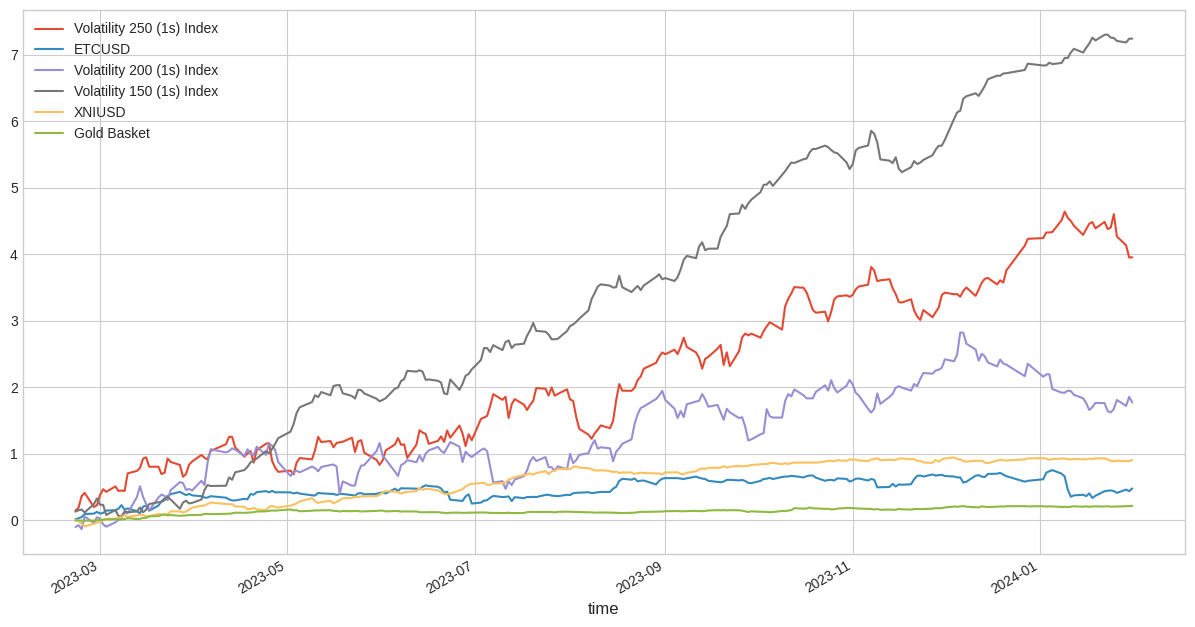

In [35]:
# Display cumulative returns of the strategies on the test set
data = results.dropna().loc["2021-01":"2024-01"]
data.cumsum().plot(figsize=(15,8))

### 16.2.3. Apply portfolio management technics

In [38]:
from packages.tf_trade.tf_trade.portfolio import Portfolio

data = results.dropna().loc["2021-01":"2024-01"]
val = results.dropna().loc["2021-01":]

portfolio = Portfolio(data)
X = portfolio.optimize_portfolio(Portfolio.mv_criterion)

print(np.round(X,3))

spread = spread_threshold # 0.00035
low_portfolio = np.multiply(low_assets,np.transpose(X)).sum(axis=1)
high_portfolio = np.multiply(high_assets,np.transpose(X)).sum(axis=1)


# Compute the cumulative return of the portfolio (CM)
portfolio_return_test = np.multiply(data,np.transpose(X)).sum(axis=1)
portfolio_return_MV = np.multiply(val,np.transpose(X)).sum(axis=1)


Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.26971118513731546
            Iterations: 10
            Function evaluations: 70
            Gradient evaluations: 10
[0.08 0.   0.   0.92 0.   0.  ]


[*********************100%***********************]  1 of 1 completed



    -----------------------------------------------------------------------------
    Beta: -0.526 	 Alpha: 593.79 %	     Sharpe: 4.694 	 Sortino: 0.518
  -----------------------------------------------------------------------------
    VaR: -18.64 %	 cVaR: -15.89 % 	     VaR/cVaR: 0.853 	 drawdown: 55.16 %
  -----------------------------------------------------------------------------


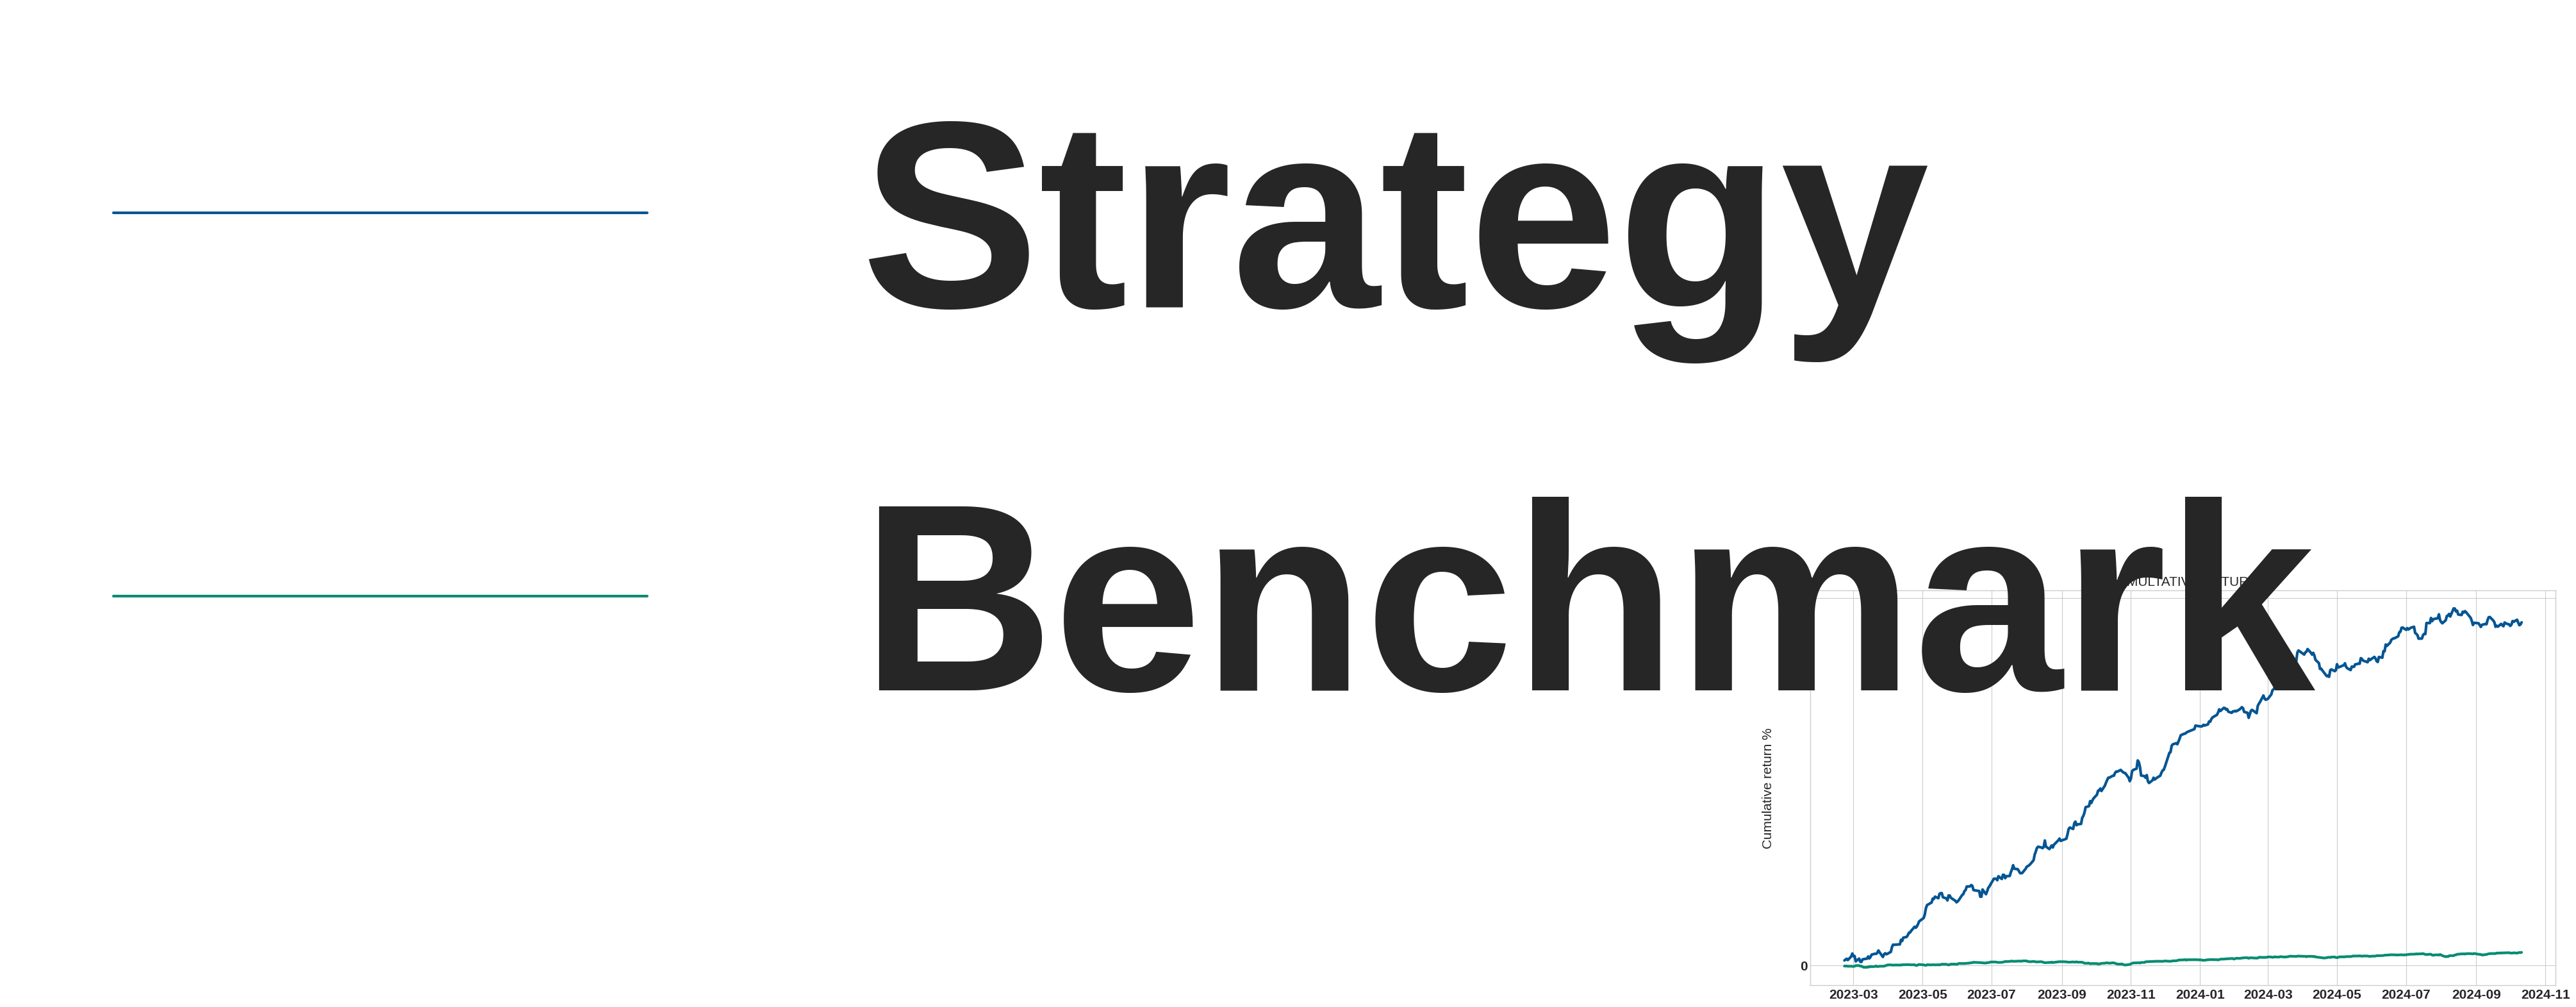

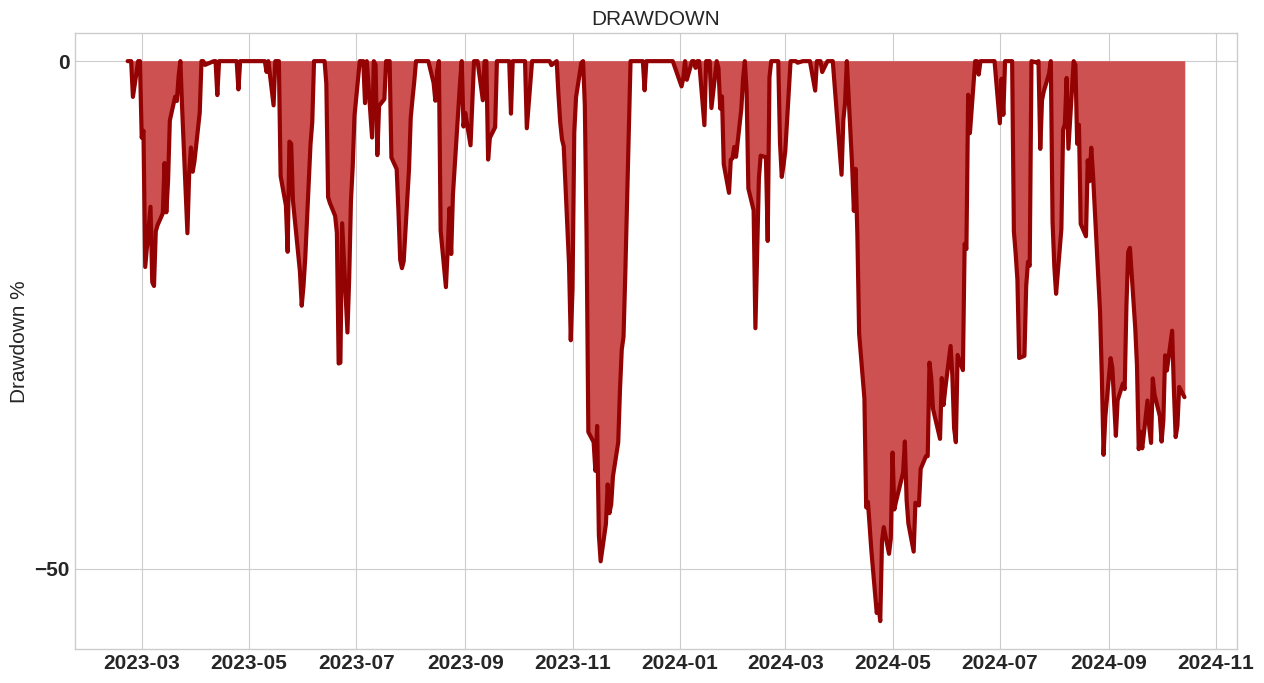

In [40]:
from packages.tf_trade.tf_trade.backtest import *
import yfinance as yf

backtest_dynamic_portfolio(portfolio_return_MV)

### 14.3.1. Optimal take profit

In [41]:
def find_best_tp(tp):
    tp = tp/100
    
    # Create the portfolio
    pf = pd.concat((low_portfolio, portfolio_return_test,high_portfolio), axis=1).dropna()-spread
    pf.columns = ["low", "Return", "high"]

    # Apply the tp
    pf["Return"] = np.where(pf["high"].values>tp, tp, pf["Return"].values)
    pf["Return"] = np.where(pf["Return"].values>tp, tp, pf["Return"].values)
    down = pf["Return"].values
    down = down[down<0]
    
    # Return sharpe raatio
    return np.sqrt(252)*pf["Return"].mean()/down.std()

pd.DataFrame([find_best_tp(tp) for tp in np.linspace(0.5,10,30)],  index=np.linspace(0.5,10,30), columns=["Sharpe"])

,Sharpe
0.500000,1.055829
0.827586,1.569399
1.155172,2.080661
1.482759,2.380377
1.810345,2.978790
2.137931,3.830634
2.465517,3.217112
2.793103,3.597647
3.120690,4.163984
3.448276,4.390178


[*********************100%***********************]  1 of 1 completed



    -----------------------------------------------------------------------------
    Beta: 0.002 	 Alpha: 245.28 %	     Sharpe: 4.531 	 Sortino: 0.204
  -----------------------------------------------------------------------------
    VaR: -7.7 %	 cVaR: -6.45 % 	     VaR/cVaR: 0.838 	 drawdown: 35.09 %
  -----------------------------------------------------------------------------


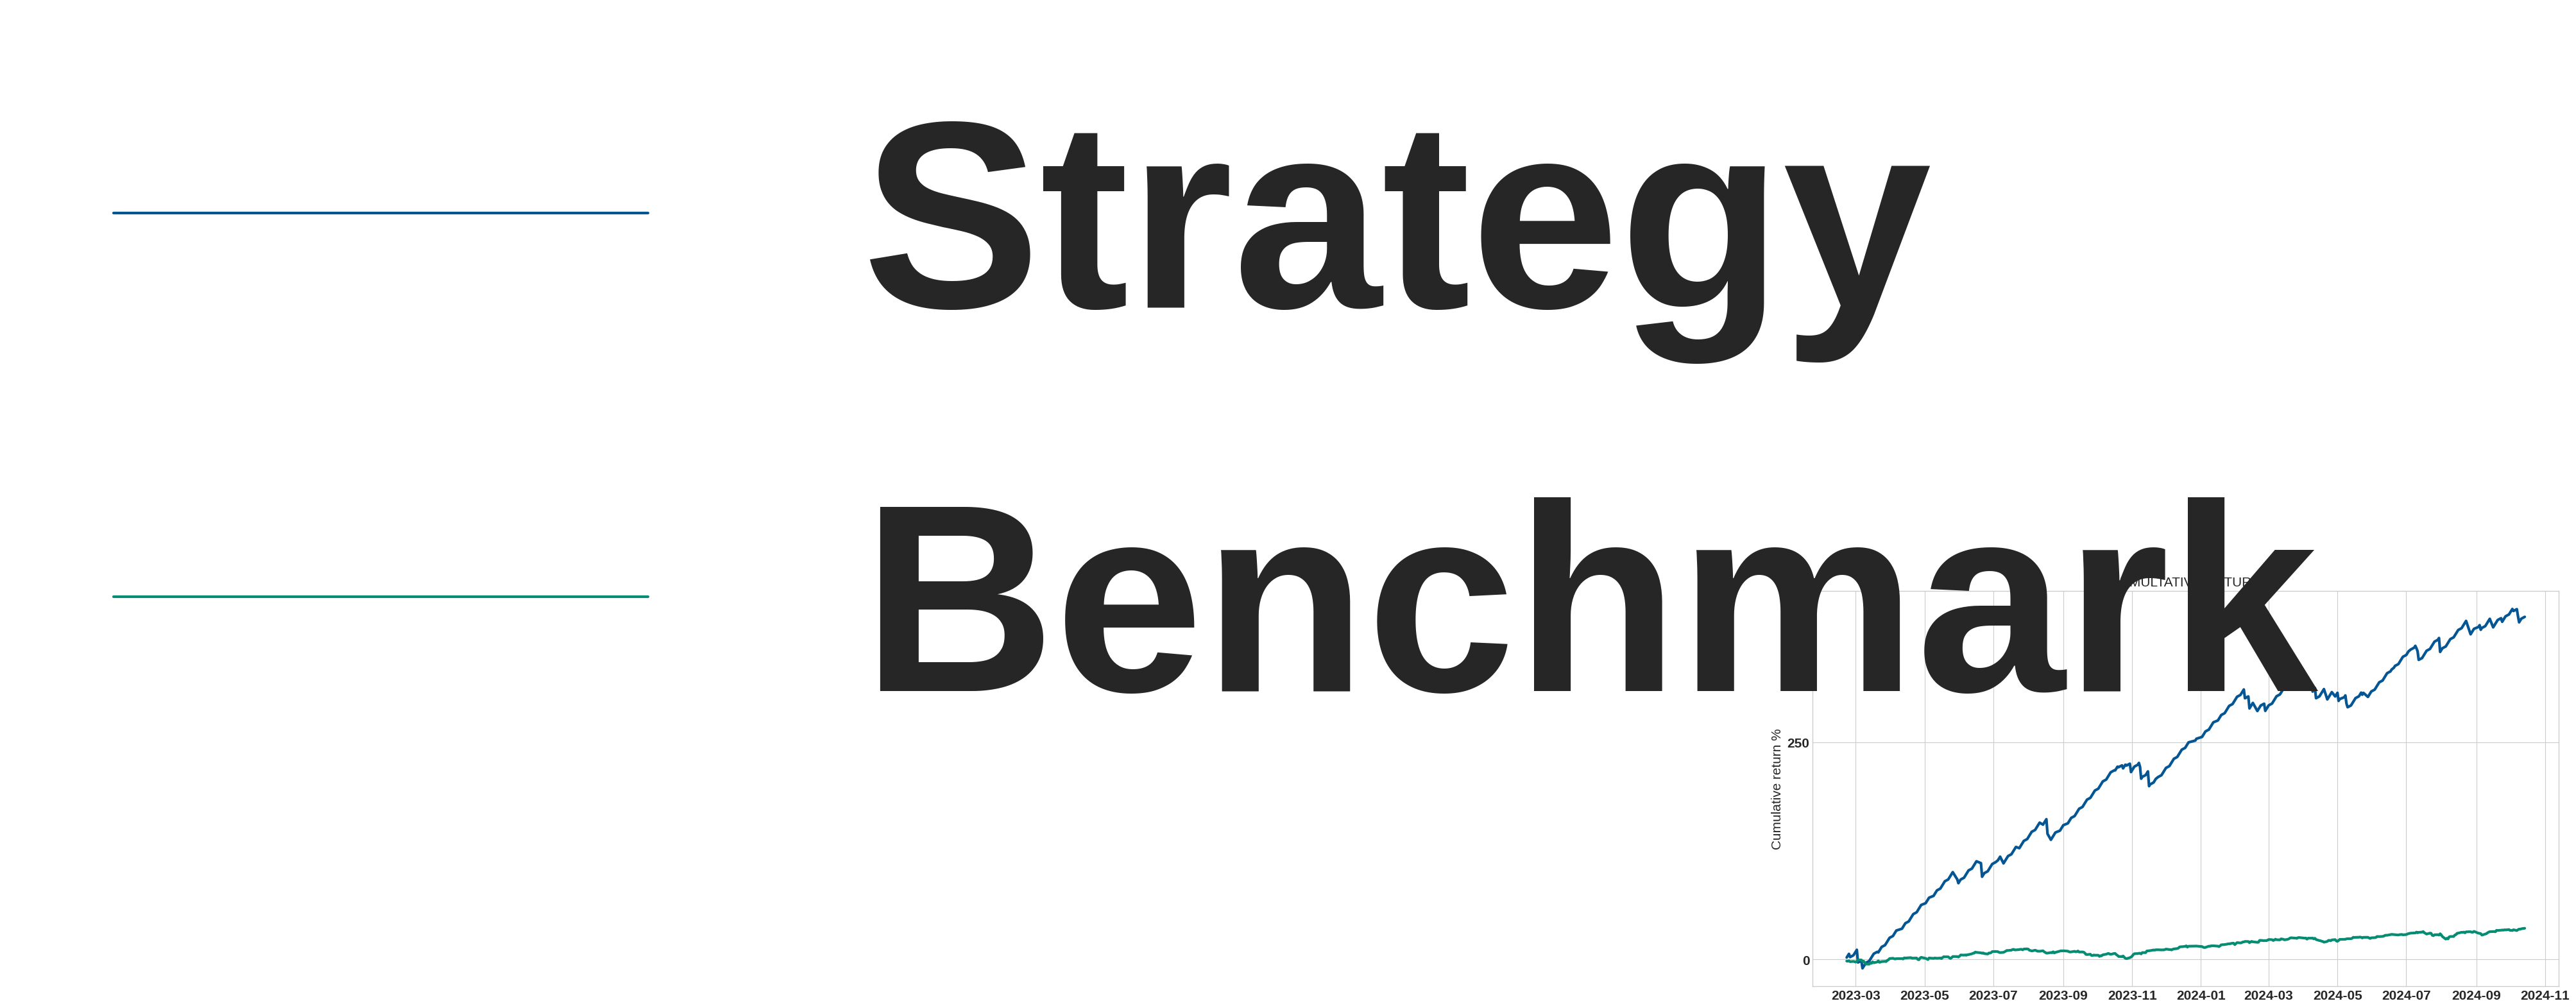

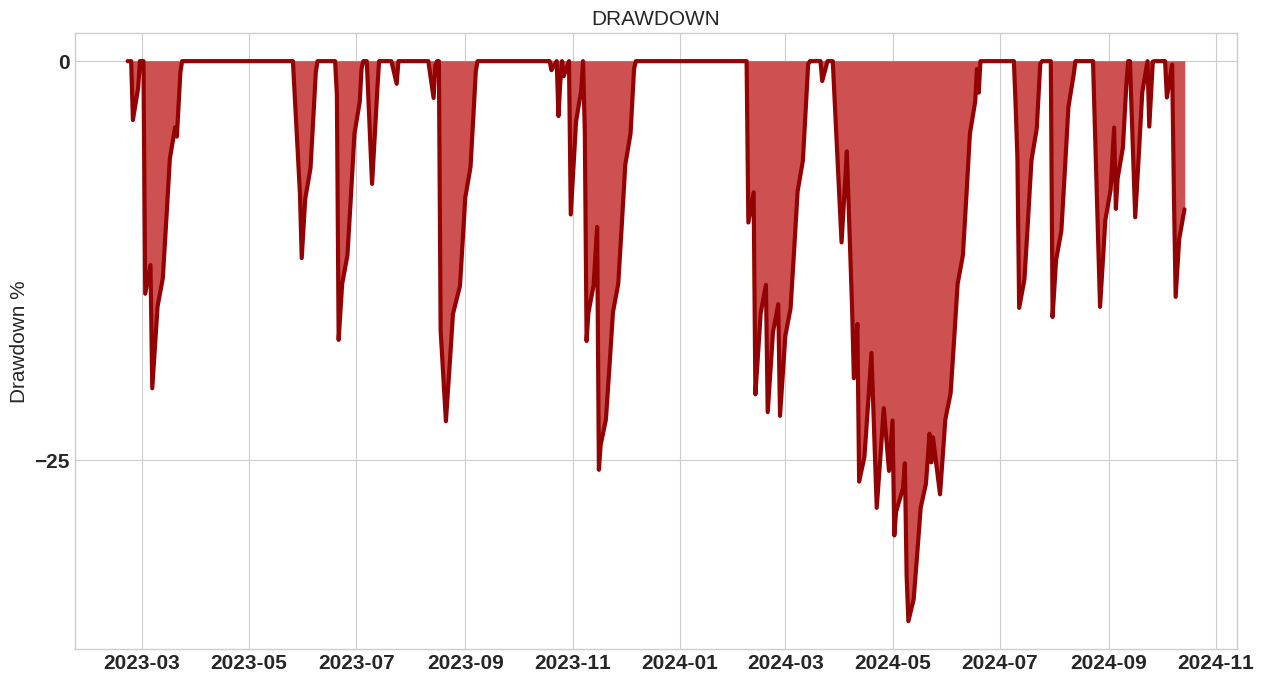

In [42]:
tp = 2.1/100
pf = pd.concat((low_portfolio, portfolio_return_MV,high_portfolio), axis=1).dropna()-spread
pf.columns = ["low", "Return", "high"]

pf["Return"] = np.where(pf["high"].values>tp, tp, pf["Return"].values)
pf["Return"] = np.where(pf["Return"].values>tp, tp, pf["Return"].values)

backtest_dynamic_portfolio(pf["Return"])

### 16.3.2. Optimal stop loss

In [43]:
def find_best_sl(sl):
    sl = sl/100
    
    # Create the portfolio
    pf = pd.concat((low_portfolio, portfolio_return_test,high_portfolio), axis=1).dropna()-spread
    pf.columns = ["low", "Return", "high"]

    # Apply the tp
    pf["Return"] = np.where(pf["low"].values<-sl, -sl, pf["Return"].values)
    pf["Return"] = np.where(pf["Return"].values<-sl, -sl, pf["Return"].values)
    
    # Return sharpe raatio
    return np.sqrt(252)*pf["Return"].mean()/pf["Return"].std()

pd.DataFrame([find_best_sl(sl) for sl in np.linspace(1,10,30)],  index=np.linspace(1,10,30), columns=["Sharpe"])

,Sharpe
1.000000,-3.857169
1.310345,-1.713192
1.620690,0.324673
1.931034,0.610155
2.241379,0.883841
2.551724,1.750272
2.862069,1.808365
3.172414,1.577537
3.482759,1.702214
3.793103,1.713768


[*********************100%***********************]  1 of 1 completed



    -----------------------------------------------------------------------------
    Beta: -0.589 	 Alpha: 489.46 %	     Sharpe: 3.849 	 Sortino: 0.509
  -----------------------------------------------------------------------------
    VaR: -11.96 %	 cVaR: -9.17 % 	     VaR/cVaR: 0.767 	 drawdown: 62.34 %
  -----------------------------------------------------------------------------


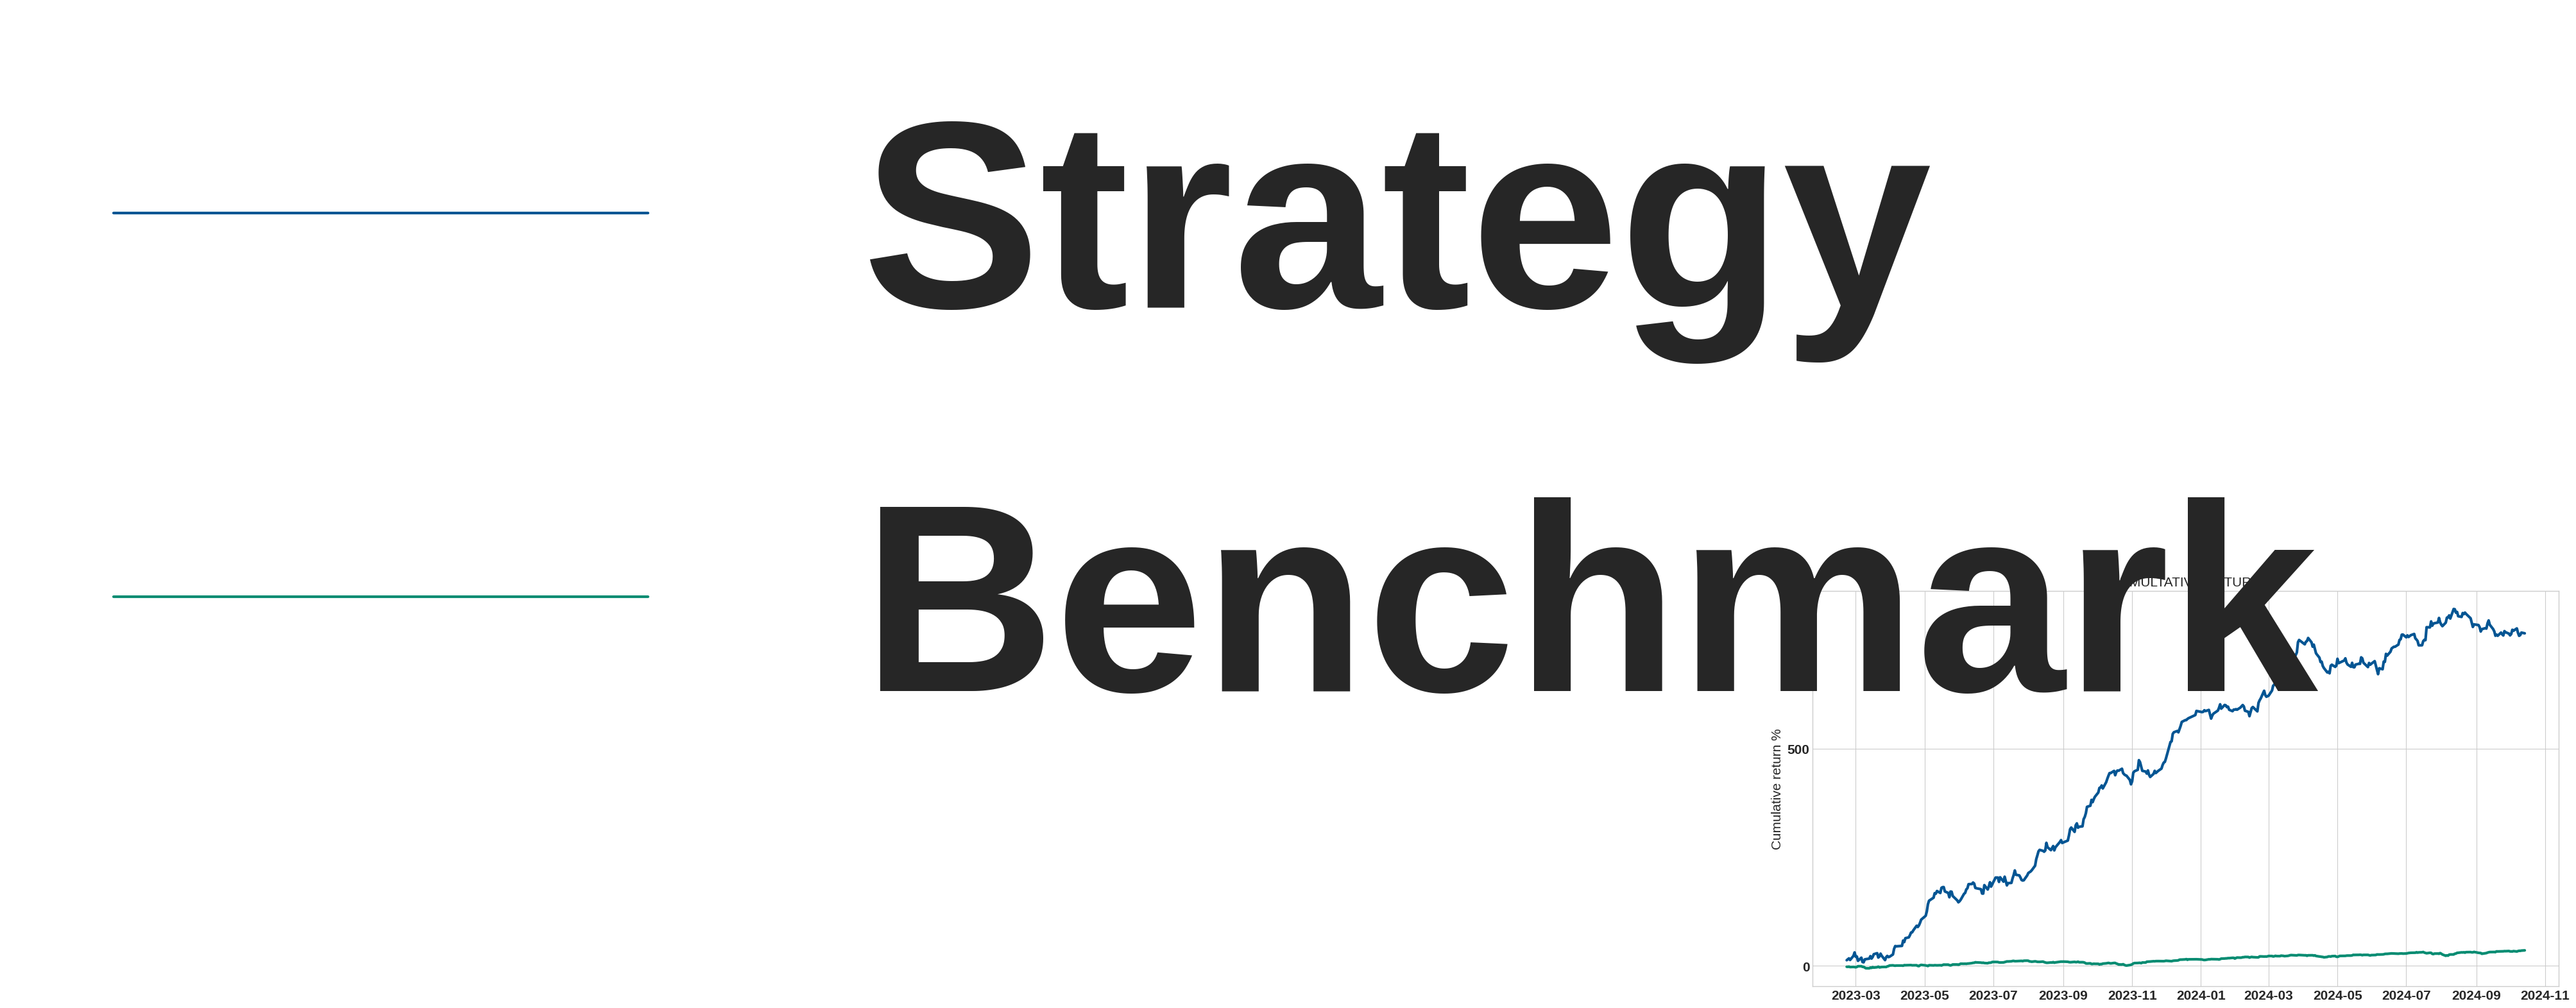

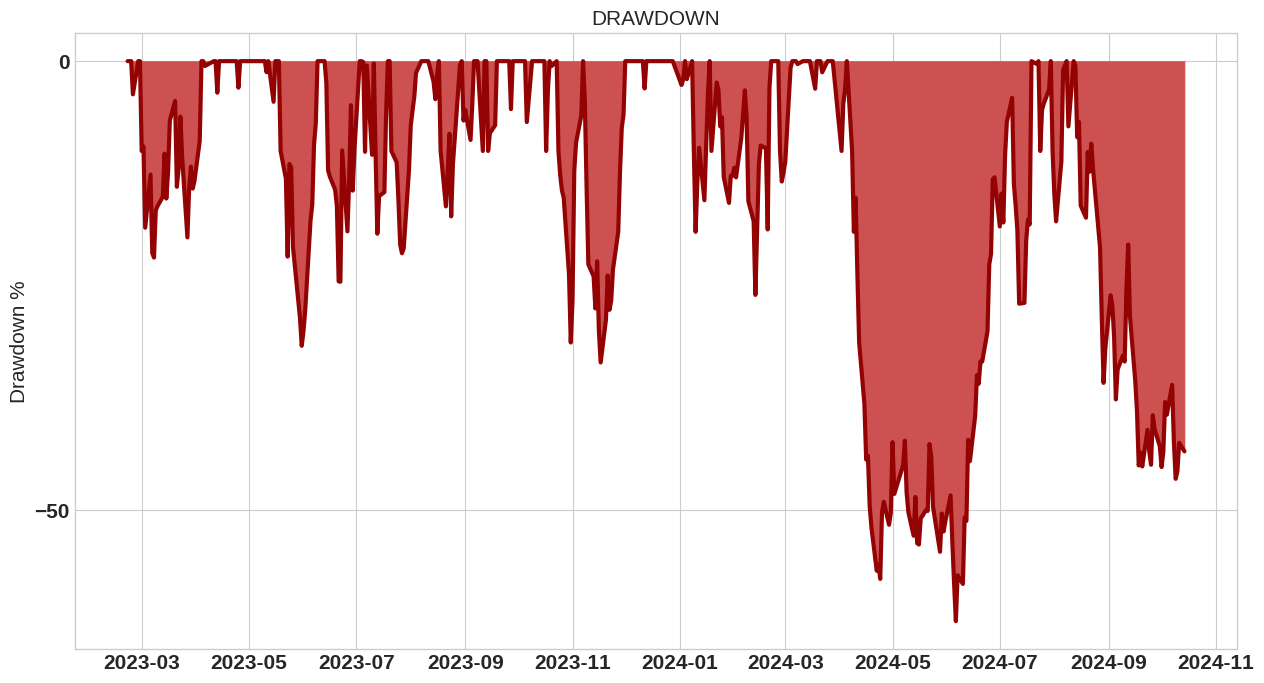

In [44]:
sl = 10/100
pf = pd.concat((low_portfolio, portfolio_return_MV,high_portfolio), axis=1).dropna()-spread

pf.columns = ["low", "Return", "high"]
pf["Return"] = np.where(pf["low"].values<-sl, -sl, pf["Return"].values)
pf["Return"] = np.where(pf["Return"].values<-sl, -sl, pf["Return"].values)


backtest_dynamic_portfolio(pf["Return"])

### 14.3.3. Optimal leverage

[*********************100%***********************]  1 of 1 completed



    -----------------------------------------------------------------------------
    Beta: -0.223 	 Alpha: 637.64 %	     Sharpe: 4.236 	 Sortino: 0.37
  -----------------------------------------------------------------------------
    VaR: -17.97 %	 cVaR: -14.8 % 	     VaR/cVaR: 0.824 	 drawdown: 69.49 %
  -----------------------------------------------------------------------------


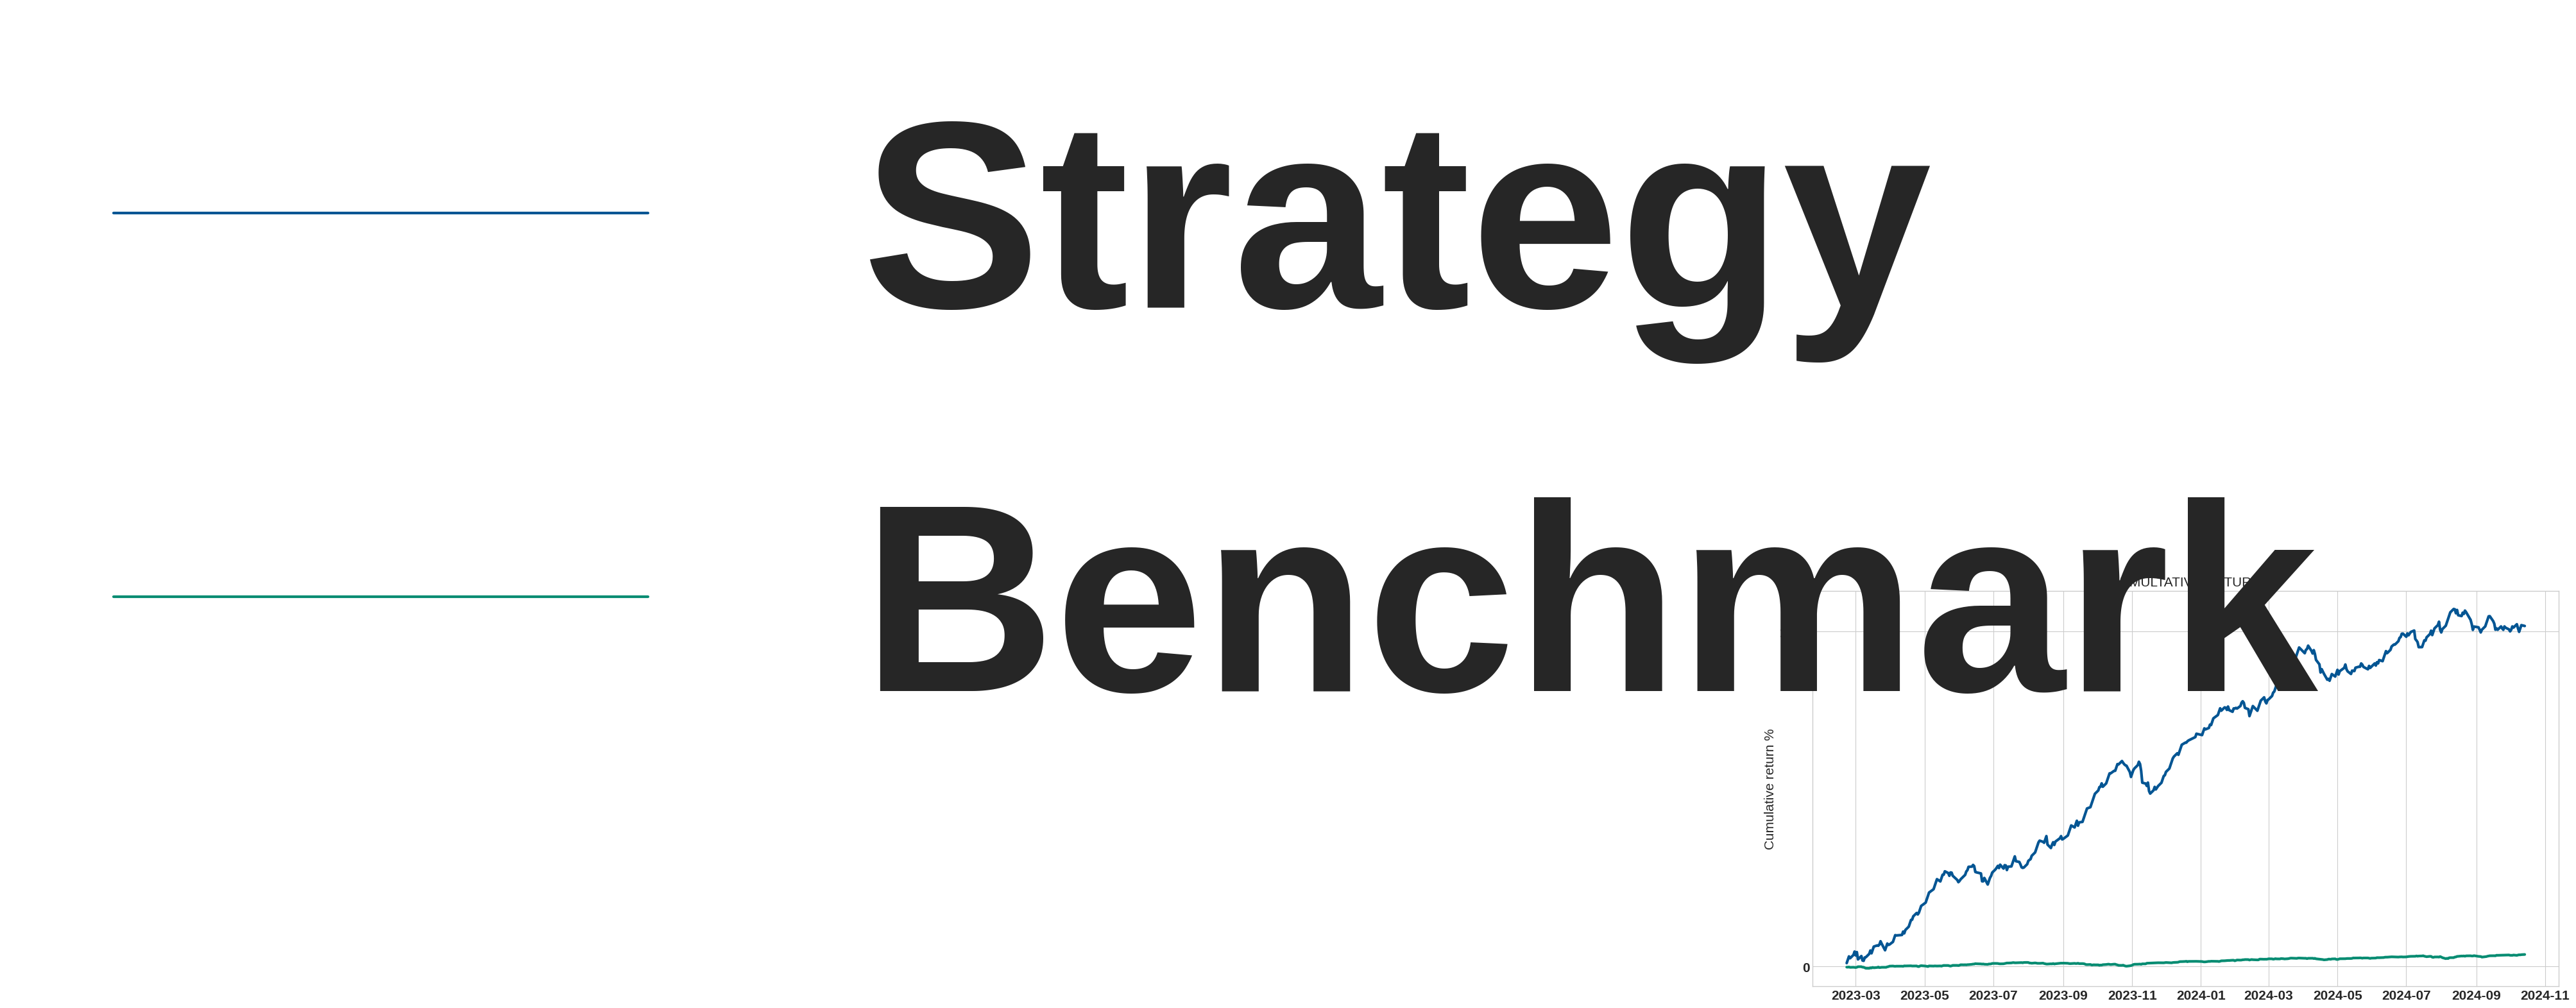

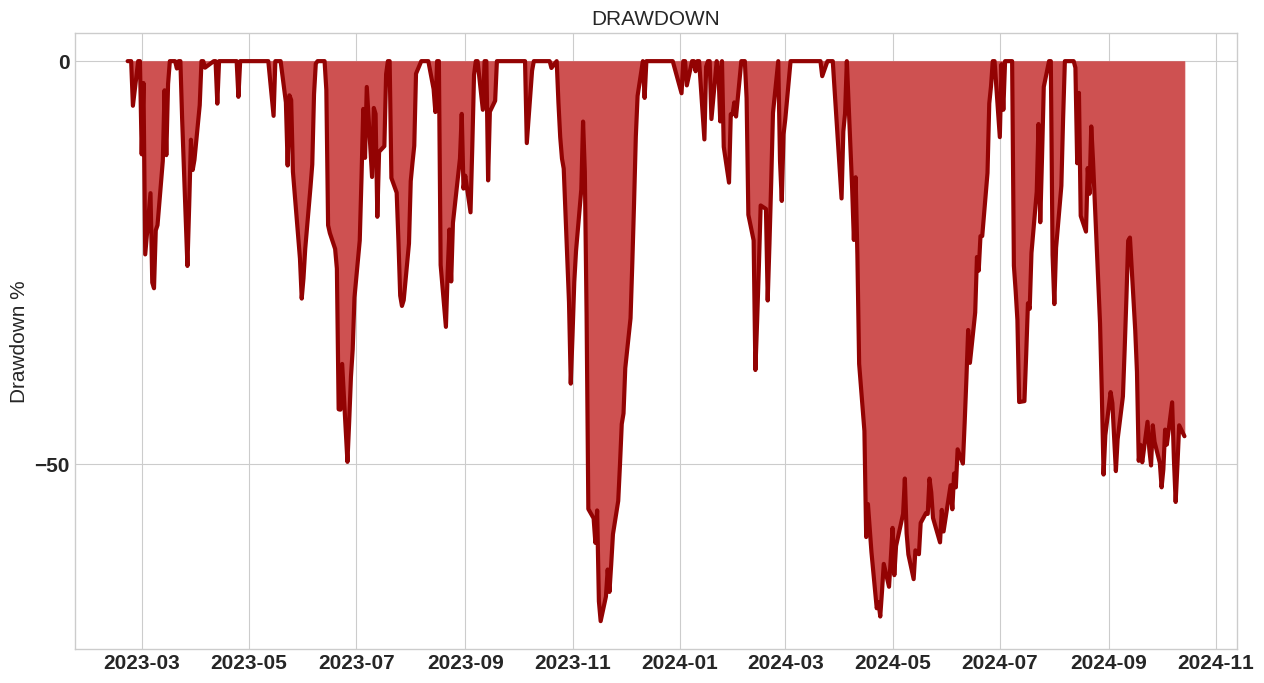

In [45]:
leverage = 1.5
tp = 10/100 # 2.1/100
sl = 10 # 7.3
pf = (pd.concat((low_portfolio, portfolio_return_MV,high_portfolio), axis=1).dropna()-spread)*leverage
pf.columns = ["low", "Return", "high"]

pf["Return"] = np.where(pf["high"].values>tp, tp, pf["Return"].values)
pf["Return"] = np.where(pf["Return"].values>tp, tp, pf["Return"].values)
pf["Return"] = np.where(pf["low"].values<-sl, -sl, pf["Return"].values)
pf["Return"] = np.where(pf["Return"].values<-sl, -sl, pf["Return"].values)

# Plot the CM
backtest_dynamic_portfolio(pf["Return"])

**Notes:**
<!-- Why has the performance does not grown since 06-2021? There are some explanations. The period's volatility is less than the other, and the strategy does not work on it, or the weight of the algorithm needs to be adjusted because the market situation has evolved. -->

